<a href="https://colab.research.google.com/github/oms77/Reopen/blob/main/Qr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.layers import Input, Conv2D , Dense, Flatten, Dropout, GlobalMaxPooling2D , MaxPooling2D , BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
train = ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_data = train.flow_from_directory("/content/drive/MyDrive/Qrs/training",target_size=(32,32),class_mode='sparse')

Found 81 images belonging to 3 classes.


In [ ]:
i = Input(shape=(32,32,3))

x = Conv2D(32, (3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(3,activation='softmax')(x)

In [ ]:
model = Model(i,x)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r = model.fit(train_data,epochs=10)

Epoch 1/10
3/3 [==============================] - 16s 6s/step - loss: 5.6551 - accuracy: 0.3580
Epoch 2/10
3/3 [==============================] - 2s 425ms/step - loss: 3.3836 - accuracy: 0.6173
Epoch 3/10
3/3 [==============================] - 1s 304ms/step - loss: 0.6650 - accuracy: 0.8519
Epoch 4/10
3/3 [==============================] - 1s 310ms/step - loss: 0.4293 - accuracy: 0.9383
Epoch 5/10
3/3 [==============================] - 1s 317ms/step - loss: 0.0916 - accuracy: 0.9753
Epoch 6/10
3/3 [==============================] - 1s 237ms/step - loss: 0.0103 - accuracy: 0.9877
Epoch 7/10
3/3 [==============================] - 1s 232ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 1s 299ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 1s 237ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 1s 228ms/step - loss: 0.0125 - accuracy: 1.0000


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0   

In [ ]:
from PIL import Image,ImageOps

1/1 [==============================] - 0s 29ms/step


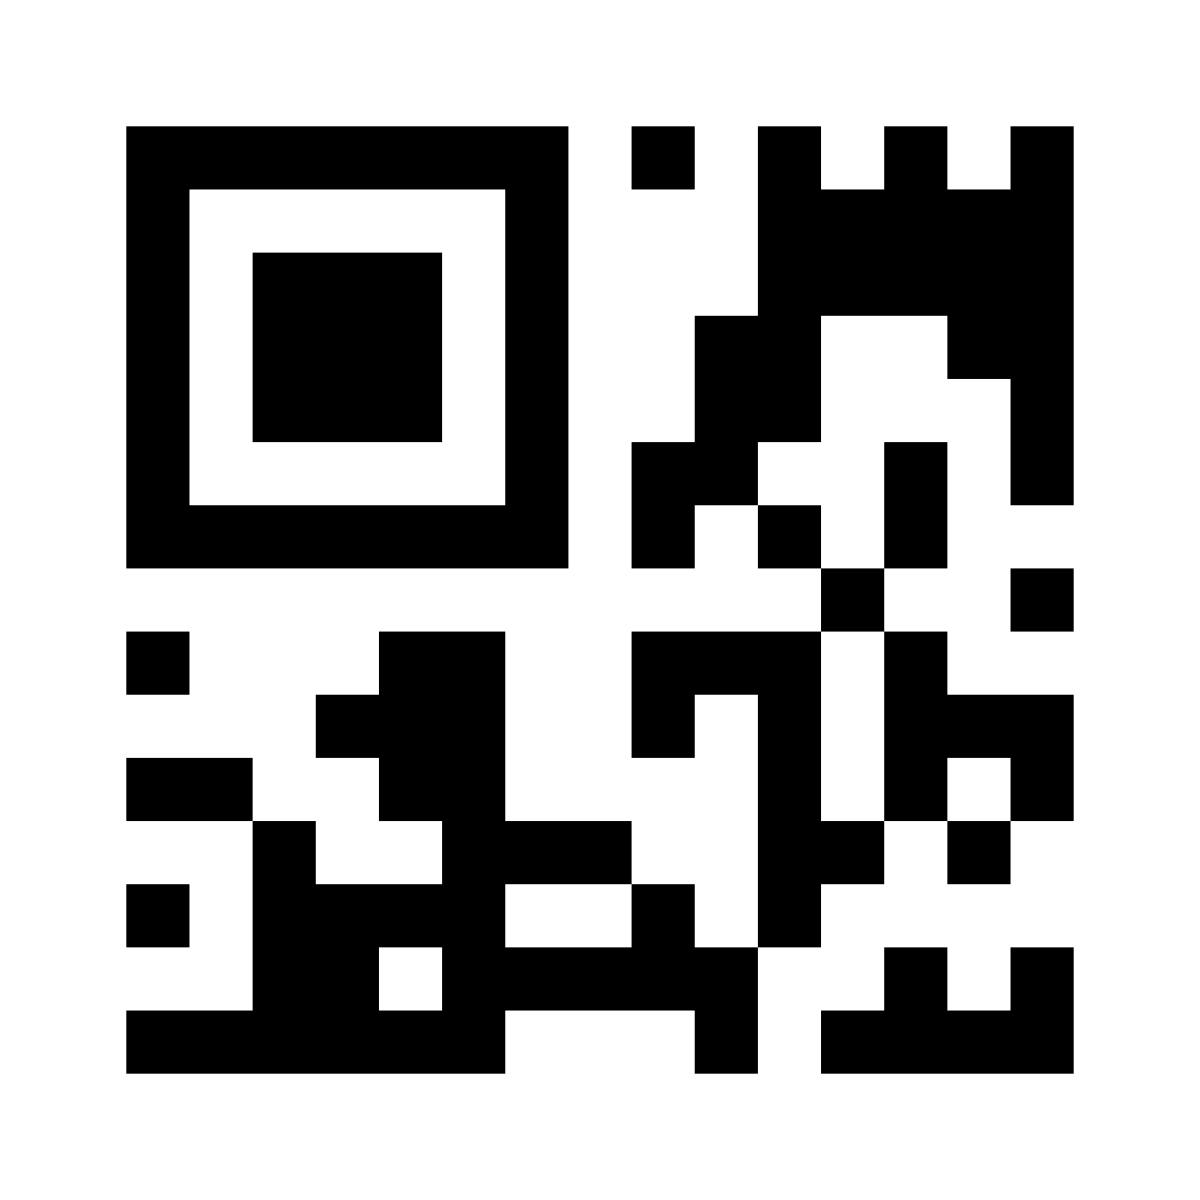

rMQR


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/sample_data/mqr.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
data = np.ndarray(shape=(1, 32, 32, 3), dtype=np.float32)
img1 = cv2.resize(img,(32,32))

#turn the image into a numpy array
image_array = np.asarray(img1)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) /255.0)

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
if np.argmax(prediction)==0:
  cv2_imshow(img)
  print("m1QR")
elif np.argmax(prediction)==1:
  cv2_imshow(img)
  print("microQR")
else:
  cv2_imshow(img)
  print("rMQR")

In [ ]:
model.save('new_qr.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
